# Milestone 1: Data Collection, Preprocessing, and Exploration

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
import seaborn as sns

In [2]:
# Define paths and parameters
DATA_PATH = r"C:\Users\shroo\Desktop\DEPI HGRS NEW2\Sign Language for Numbers"
IMG_SIZE = 64  # Resize images to 64x64
NUM_CLASSES = 11  # 0-9 + unknown

In [3]:
def load_dataset(data_path):
    """Load images and labels from the dataset directory"""
    images = []
    labels = []
    class_names = []
    
    # Iterate through class folders
    for class_id, class_name in enumerate(sorted(os.listdir(data_path))):
        class_dir = os.path.join(data_path, class_name)
        if os.path.isdir(class_dir):
            class_names.append(class_name)
            print(f"Loading class: {class_name} (ID: {class_id})")
            
            # Load all images for this class
            for img_name in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_name)
                try:
                    # Read and preprocess image
                    img = cv2.imread(img_path)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                    
                    images.append(img)
                    labels.append(class_id)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    
    # Convert to numpy arrays
    X = np.array(images)
    y = np.array(labels)
    
    return X, y, class_names

In [4]:
def visualize_samples(X, y, class_names, num_samples=10):
    """Visualize random samples from the dataset"""
    plt.figure(figsize=(15, 8))
    for i in range(num_samples):
        idx = np.random.randint(0, len(X))
        plt.subplot(2, 5, i+1)
        plt.imshow(X[idx])
        plt.title(f"Class: {class_names[y[idx]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

In [5]:
def preprocess_data(X, y):
    """Preprocess the data for model training"""
    # Normalize pixel values to [0, 1]
    X_processed = X.astype('float32') / 255.0
    
    # Split into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X_processed, y, test_size=0.3, random_state=42, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
    
    # Convert labels to one-hot encoding
    y_train_cat = to_categorical(y_train, NUM_CLASSES)
    y_val_cat = to_categorical(y_val, NUM_CLASSES)
    y_test_cat = to_categorical(y_test, NUM_CLASSES)
    
    print(f"Train set: {X_train.shape}, {y_train.shape}")
    print(f"Validation set: {X_val.shape}, {y_val.shape}")
    print(f"Test set: {X_test.shape}, {y_test.shape}")
    
    return X_train, X_val, X_test, y_train_cat, y_val_cat, y_test_cat, y_train, y_val, y_test

In [6]:
def explore_data_distribution(y, class_names):
    """Explore the class distribution in the dataset"""
    # Count samples per class
    unique, counts = np.unique(y, return_counts=True)
    class_dist = {class_names[c]: n for c, n in zip(unique, counts)}
    
    # Plot class distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(class_dist.keys()), y=list(class_dist.values()))
    plt.title('Number of Images per Class')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

     # Print distribution details
    print("Class distribution:")
    for cls, count in class_dist.items():
        print(f"{cls}: {count} images ({count/len(y)*100:.2f}%)")

In [7]:
def data_augmentation_preview(X, y, class_names):
    """Preview data augmentation techniques on a sample image"""
    from tensorflow.keras.preprocessing.image import ImageDataGenerator
    
    # Sample image
    sample_idx = np.random.randint(0, len(X))
    sample_img = X[sample_idx]
    sample_class = class_names[y[sample_idx]]
    
    # Create augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Generate augmented images
    aug_iter = datagen.flow(np.expand_dims(sample_img, axis=0), batch_size=1)
    
    # Display original and augmented images
    plt.figure(figsize=(12, 8))
    plt.subplot(3, 3, 1)
    plt.imshow(sample_img)
    plt.title(f"Original - Class: {sample_class}")
    plt.axis('off')
    
    for i in range(8):
        aug_img = next(aug_iter)[0].astype('uint8')
        plt.subplot(3, 3, i+2)
        plt.imshow(aug_img)
        plt.title(f"Augmented {i+1}")
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

Loading class: 0 (ID: 0)
Loading class: 1 (ID: 1)
Loading class: 2 (ID: 2)
Loading class: 3 (ID: 3)
Loading class: 4 (ID: 4)
Loading class: 5 (ID: 5)
Loading class: 6 (ID: 6)
Loading class: 7 (ID: 7)
Loading class: 8 (ID: 8)
Loading class: 9 (ID: 9)
Loading class: unknown (ID: 10)
Dataset loaded: 16500 images, 11 classes


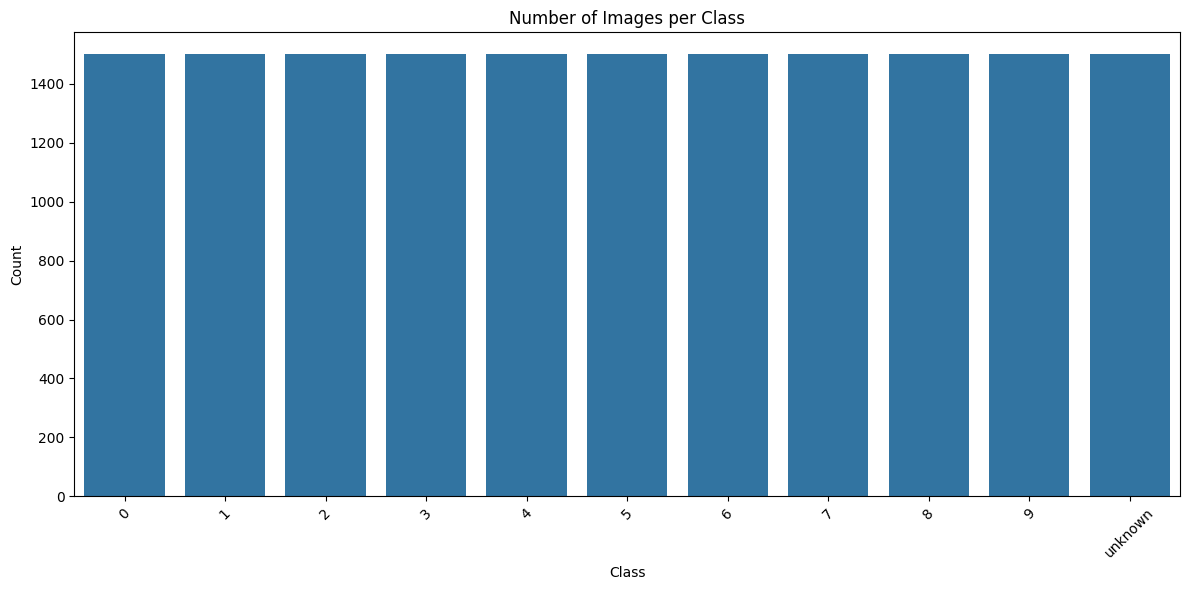

Class distribution:
0: 1500 images (9.09%)
1: 1500 images (9.09%)
2: 1500 images (9.09%)
3: 1500 images (9.09%)
4: 1500 images (9.09%)
5: 1500 images (9.09%)
6: 1500 images (9.09%)
7: 1500 images (9.09%)
8: 1500 images (9.09%)
9: 1500 images (9.09%)
unknown: 1500 images (9.09%)


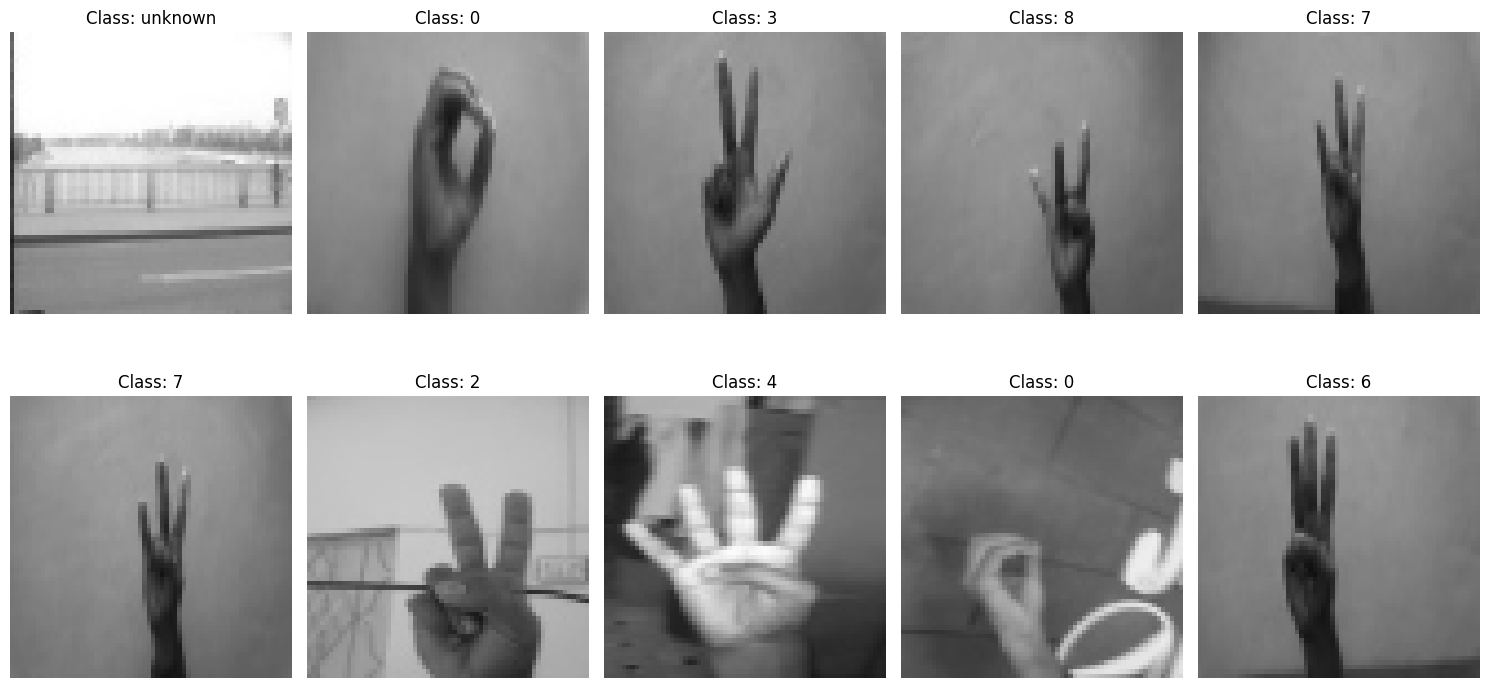

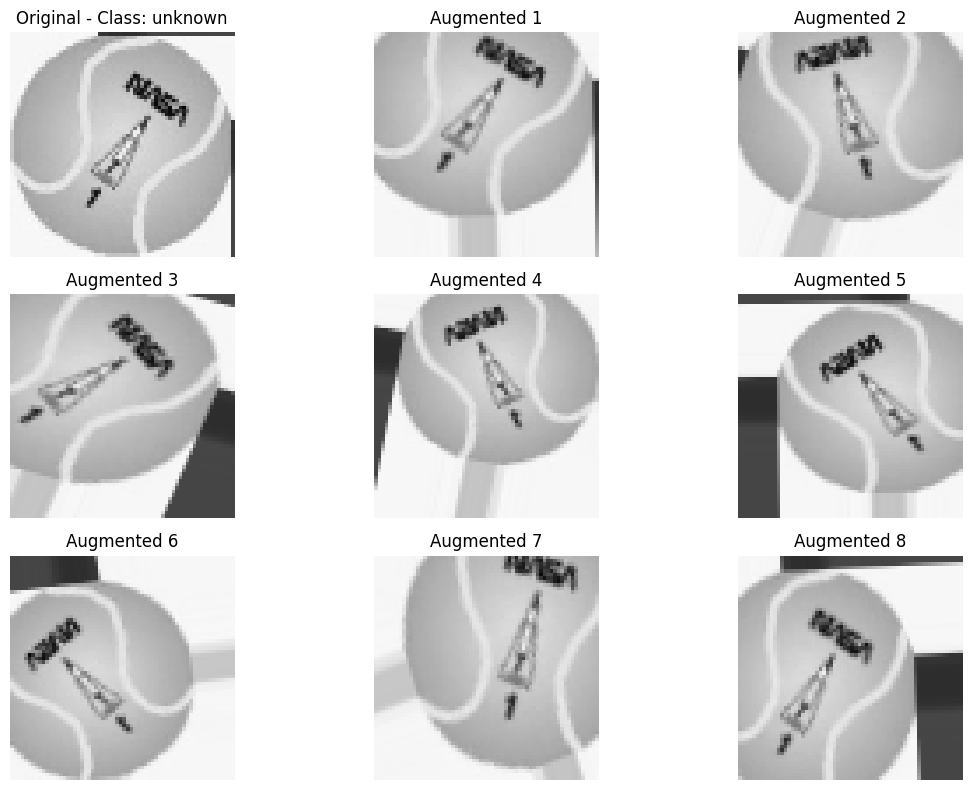

Train set: (11550, 64, 64, 3), (11550,)
Validation set: (2475, 64, 64, 3), (2475,)
Test set: (2475, 64, 64, 3), (2475,)
Data preprocessing complete! Preprocessed data saved to 'data/' directory.


In [9]:
# Main execution flow
if __name__ == "__main__":
    # Load the dataset
    X, y, class_names = load_dataset(DATA_PATH)
    print(f"Dataset loaded: {X.shape[0]} images, {len(class_names)} classes")
    
    # Explore data distribution
    explore_data_distribution(y, class_names)
    
    # Visualize random samples
    visualize_samples(X, y, class_names)
    
    # Preview data augmentation
    data_augmentation_preview(X, y, class_names)
    
    # Preprocess data for model training
    X_train, X_val, X_test, y_train_cat, y_val_cat, y_test_cat, y_train, y_val, y_test = preprocess_data(X, y)
    
    # Create the 'data' directory if it doesn't exist
    os.makedirs('data', exist_ok=True)

    # Save processed data for model training
    np.save('data/X_train.npy', X_train)
    np.save('data/X_val.npy', X_val)
    np.save('data/X_test.npy', X_test)
    np.save('data/y_train_cat.npy', y_train_cat)
    np.save('data/y_val_cat.npy', y_val_cat)
    np.save('data/y_test_cat.npy', y_test_cat)
    
    print("Data preprocessing complete! Preprocessed data saved to 'data/' directory.")

# Milestone 2: Model Development and Training

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.regularizers import l2
import seaborn as sns

In [43]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Constants
IMG_SIZE = 64
NUM_CLASSES = 11
BATCH_SIZE = 32
EPOCHS = 25

In [42]:
def load_preprocessed_data():
    """Load preprocessed data from disk"""
    X_train = np.load('data/X_train.npy')
    X_val = np.load('data/X_val.npy')
    X_test = np.load('data/X_test.npy')
    y_train_cat = np.load('data/y_train_cat.npy')
    y_val_cat = np.load('data/y_val_cat.npy')
    y_test_cat = np.load('data/y_test_cat.npy')
    
    return X_train, X_val, X_test, y_train_cat, y_val_cat, y_test_cat

In [39]:
def create_data_generators(X_train, y_train_cat):
    """Create data generators with augmentation for training"""
    # Data augmentation for training
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    
    # Create generator
    train_generator = train_datagen.flow(
        X_train, y_train_cat,
        batch_size=BATCH_SIZE
    )
    
    return train_generator

In [25]:
def build_custom_cnn():
    """Build a custom CNN model with L2 regularization"""
    model = Sequential([
        # Input Layer
        Input(shape=(IMG_SIZE, IMG_SIZE, 3)),

        # First Convolutional Block
        Conv2D(32, (3, 3), activation='relu', padding='same',
               input_shape=(IMG_SIZE, IMG_SIZE, 3),
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(32, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Second Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Third Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation='relu', padding='same',
               kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        # Flatten and Dense Layers
        Flatten(),
        Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(NUM_CLASSES, activation='softmax')
    ])
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [26]:
def build_transfer_learning_model():
    """Build a transfer learning model using MobileNetV2"""
    # Load MobileNetV2 as base model (without top layers)
    base_model = MobileNetV2(
        weights='imagenet',
        include_top=False,
        input_shape=(IMG_SIZE, IMG_SIZE, 3)
    )
    
    # Freeze base model layers
    base_model.trainable = False
    
    # Create new model
    inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs, training=False)
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    outputs = Dense(NUM_CLASSES, activation='softmax')(x)
    
    model = Model(inputs, outputs)
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [27]:
def train_model(model, X_train, y_train_cat, X_val, y_val_cat, use_augmentation=True):
    """Train the model with callbacks and optional data augmentation"""
    # Create output directory for model checkpoints
    os.makedirs('models', exist_ok=True)
    
    # Define callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6),
        ModelCheckpoint('models/best_model.keras', save_best_only=True)
    ]
    
    if use_augmentation:
        # Train with data augmentation
        train_generator = create_data_generators(X_train, y_train_cat)
        
        history = model.fit(
            train_generator,
            #steps_per_epoch=len(X_train) // BATCH_SIZE,
            epochs=EPOCHS,
            validation_data=(X_val, y_val_cat),
            callbacks=callbacks
        )
    else:
        # Train without data augmentation
        history = model.fit(
            train_generator,
            epochs=EPOCHS,
            validation_data=(X_val, y_val_cat),
            callbacks=callbacks
        )
    
    return model, history

In [ ]:
def evaluate_model(model, X_test, y_test_cat, class_names, history):
    """Evaluate model performance and generate visualizations"""
    # Evaluate model
    test_loss, test_acc = model.evaluate(X_test, y_test_cat)
    print(f"Test accuracy: {test_acc:.4f}")
    print(f"Test loss: {test_loss:.4f}")
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test_cat, axis=1)
    
    # Calculate classification report
    report = classification_report(
        y_true_classes, 
        y_pred_classes, 
        target_names=class_names, 
        output_dict=True
    )
    
    # Print classification report
    print("\nClassification Report:")
    for class_name in class_names:
        precision = report[class_name]['precision']
        recall = report[class_name]['recall']
        f1 = report[class_name]['f1-score']
        support = report[class_name]['support']
        print(f"{class_name}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}, Support={support}")

    import pandas as pd
    # Create bar plot for precision, recall, f1-score
    report_df = pd.DataFrame(classification_report(
    y_true_classes, y_pred_classes, target_names=class_names, output_dict=True
)).T.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(12, 6))
    plt.title('Per-Class Performance Metrics')
    plt.ylabel('Score')
    plt.ylim(0, 1.05)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('per_class_metrics.png')
    plt.show()
    
    # Plot confusion matrix
    plt.figure(figsize=(12, 10))
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()
    
    # Plot training history
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()
    
    # Visualize misclassified examples
    misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]
    
    if len(misclassified_indices) > 0:
        plt.figure(figsize=(15, 10))
        for i, idx in enumerate(misclassified_indices[:min(10, len(misclassified_indices))]):
            plt.subplot(2, 5, i+1)
            plt.imshow(X_test[idx] * 255.0)
            plt.title(f"True: {class_names[y_true_classes[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
            plt.axis('off')
        plt.tight_layout()
        plt.savefig('misclassified_examples.png')
        plt.show()
    
    return y_pred, y_pred_classes, y_true_classes

In [29]:
def save_model_summary(model):
    """Save model summary to a text file"""
    with open('model_summary.txt', 'w') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))
    
    print("Model summary saved to 'model_summary.txt'")


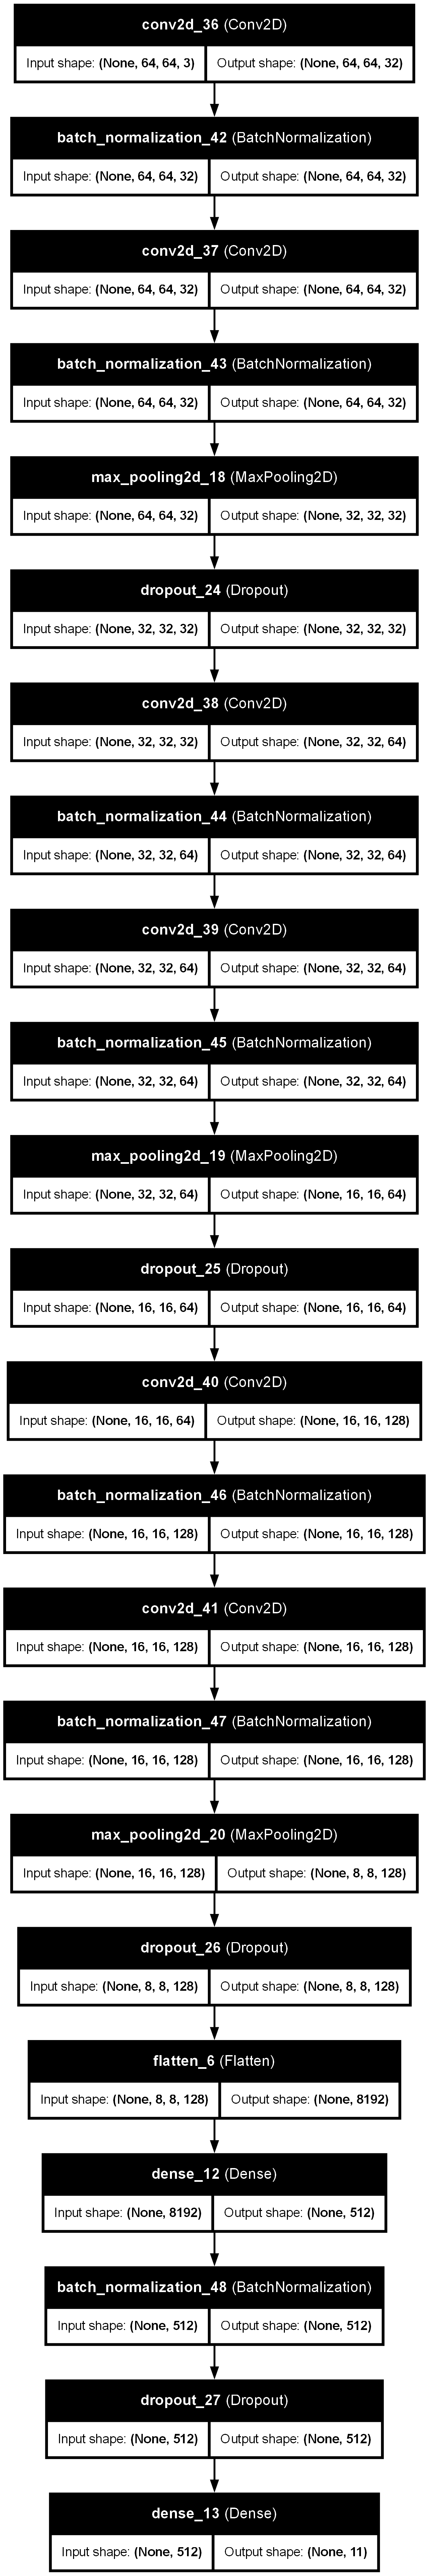

In [31]:
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"
from tensorflow.keras.utils import plot_model

# Save a visual diagram of the CNN model architecture
model = build_custom_cnn()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


Building custom CNN model...


Model summary saved to 'model_summary.txt'
Training model...
Epoch 1/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 126s 327ms/step - accuracy: 0.1875 - loss: 4.3598 - val_accuracy: 0.1620 - val_loss: 5.0655 - learning_rate: 0.0010
Epoch 2/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 115s 319ms/step - accuracy: 0.3339 - loss: 3.5042 - val_accuracy: 0.4299 - val_loss: 2.9434 - learning_rate: 0.0010
Epoch 3/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 116s 322ms/step - accuracy: 0.4487 - loss: 2.9100 - val_accuracy: 0.5600 - val_loss: 2.3663 - learning_rate: 0.0010
Epoch 4/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 116s 321ms/step - accuracy: 0.5797 - loss: 2.4361 - val_accuracy: 0.6178 - val_loss: 2.3854 - learning_rate: 0.0010
Epoch 5/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 115s 319ms/step - accuracy: 0.6649 - loss: 2.1671 - val_accuracy: 0.8089 - val_loss: 1.7587 - learning_rate: 0.0010
Epoch 6/25
361/361 ━━━━━━━━━━━━━━━━━━━━ 115s 319ms/step - accuracy: 0.7239 - loss: 2.0035 - val_accuracy: 0.8384 - val_loss: 1.6707 - learning_rate: 0.0010
Epo

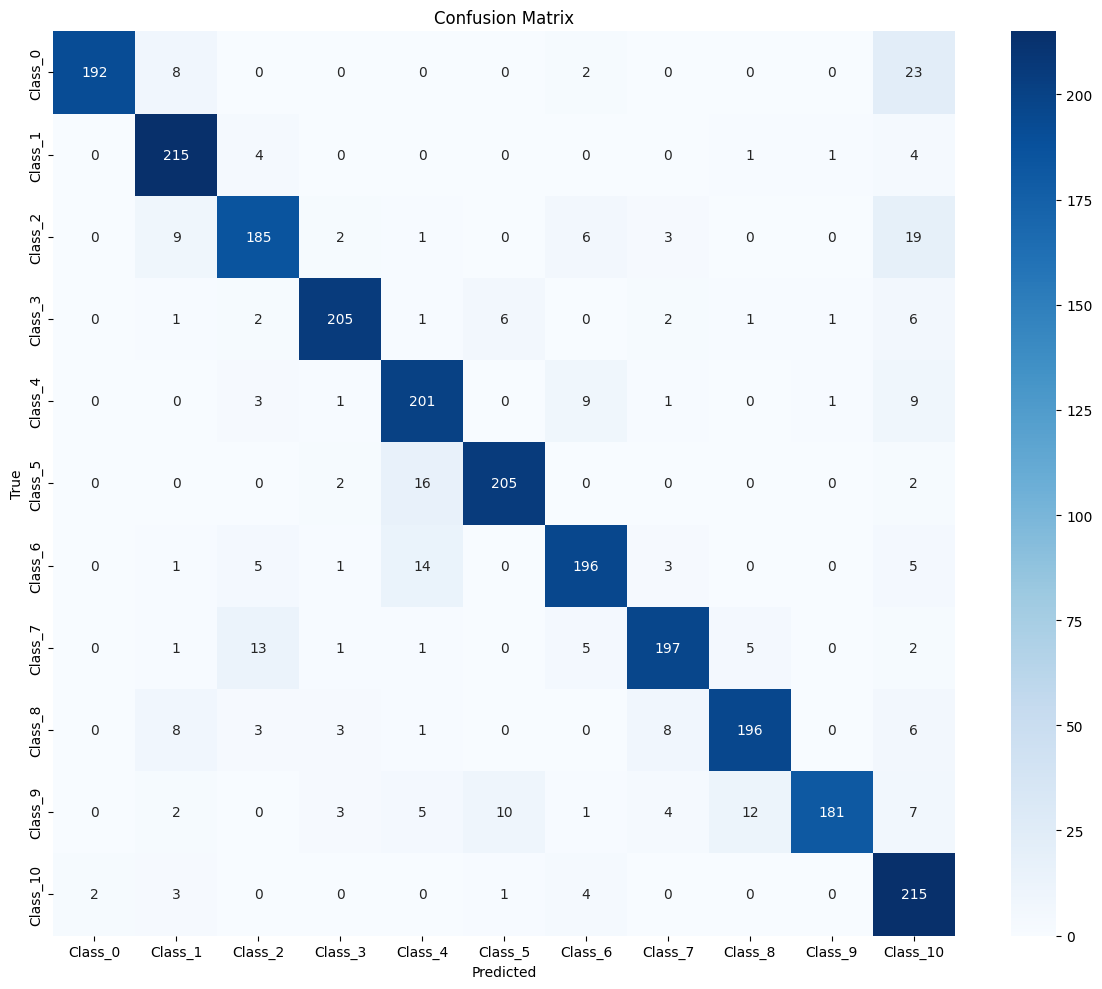

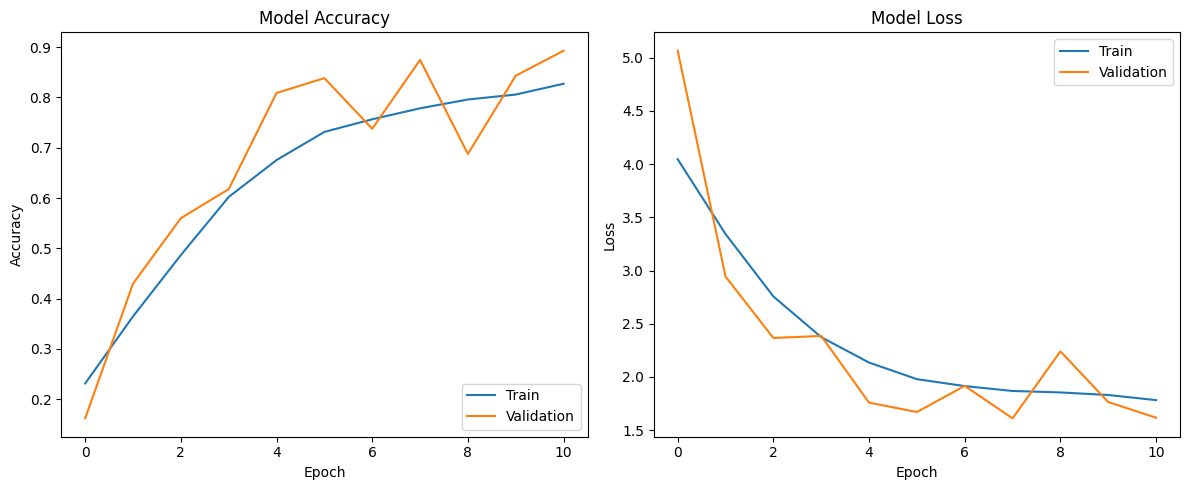

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11.0..182.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [9.0..243.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [26.0..205.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [20.0..215.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [28.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [13.0..212.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [4.0..241.0].
Clipping input data to the valid range for imshow with RG

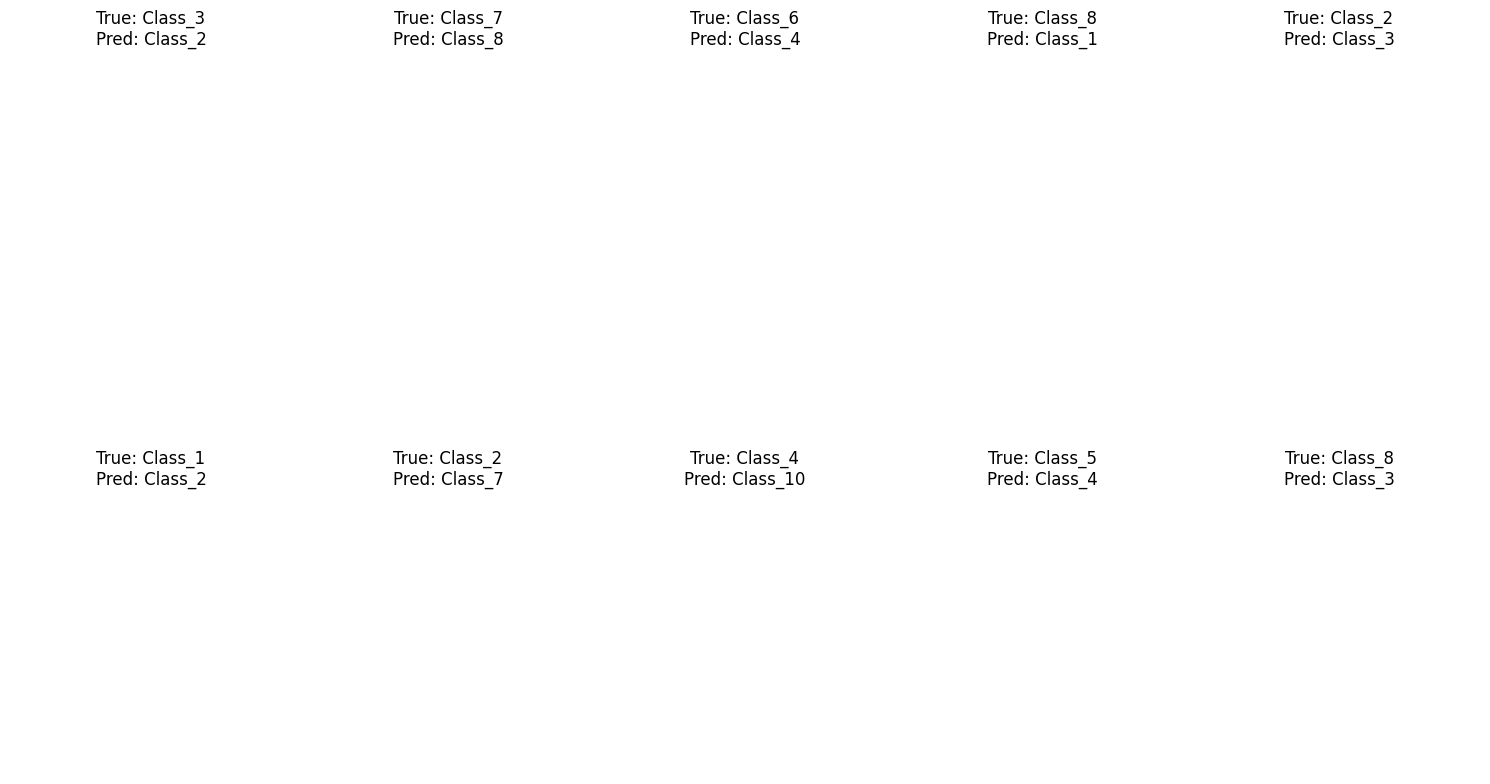

Model saved to 'models/hand_gesture_model.keras'


In [48]:
# Main execution flow
if __name__ == "__main__":
    # Load preprocessed data
    X_train, X_val, X_test, y_train_cat, y_val_cat, y_test_cat = load_preprocessed_data()
    
    # Load class names (you would need to save these during preprocessing)
    # For now, we'll just use generic names
    class_names = [f"Class_{i}" for i in range(NUM_CLASSES)]
    
    # Build model
    print("Building custom CNN model...")
    model = build_custom_cnn()
    
    # Save model architecture summary
    save_model_summary(model)
    
    # Train model
    print("Training model...")
    model, history = train_model(model, X_train, y_train_cat, X_val, y_val_cat)
    
    # Evaluate model
    print("Evaluating model...")
    y_pred, y_pred_classes, y_true_classes = evaluate_model(model, X_test, y_test_cat, class_names, history)

    # Save the model
    model.save('models/hand_gesture_model.keras')
    print("Model saved to 'models/hand_gesture_model.keras'")

78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step


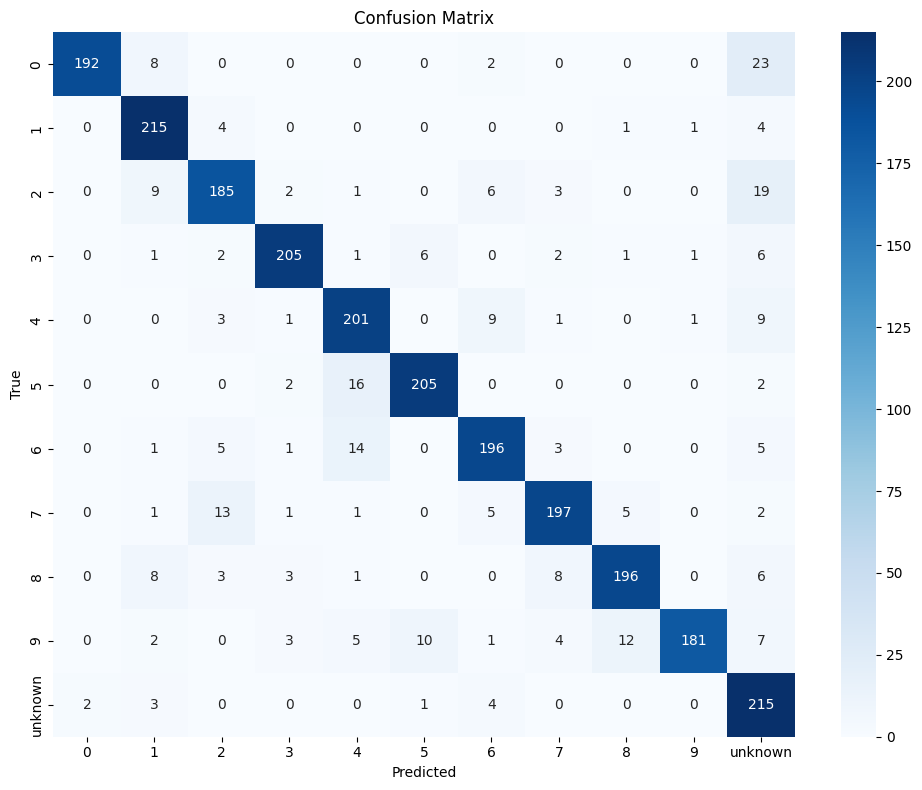

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import load_model

# Load test data
X_test = np.load('data/X_test.npy')
y_test_cat = np.load('data/y_test_cat.npy')

# Load model
model = load_model('models/hand_gesture_model.keras')

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)
class_names = [str(i) for i in range(10)] + ['unknown']

# Plot confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig("confusion_matrix_slide.png")
plt.show()


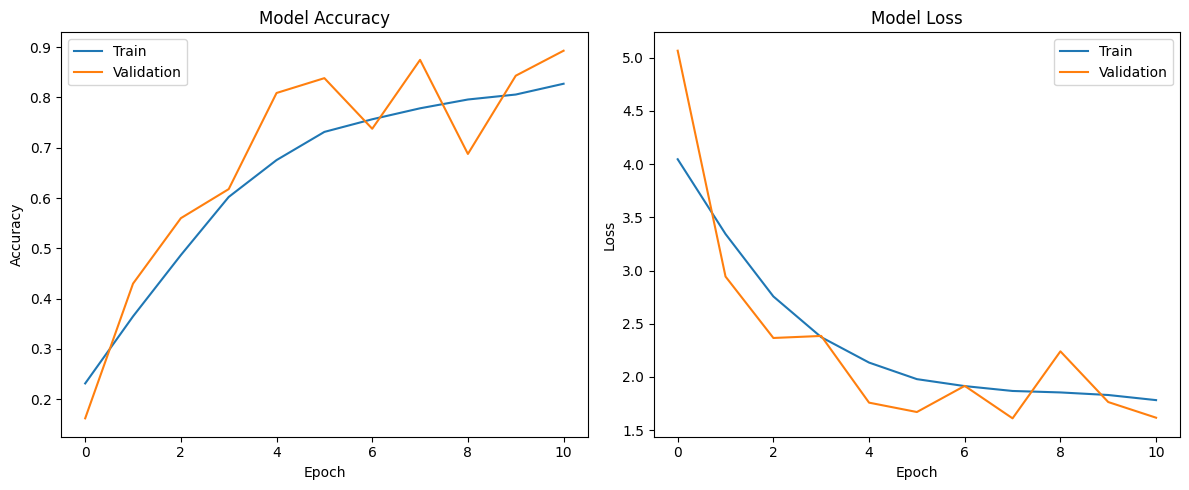

In [50]:
# Replace `history` with the actual History object from model.fit()
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("training_history_slide.png")
plt.show()


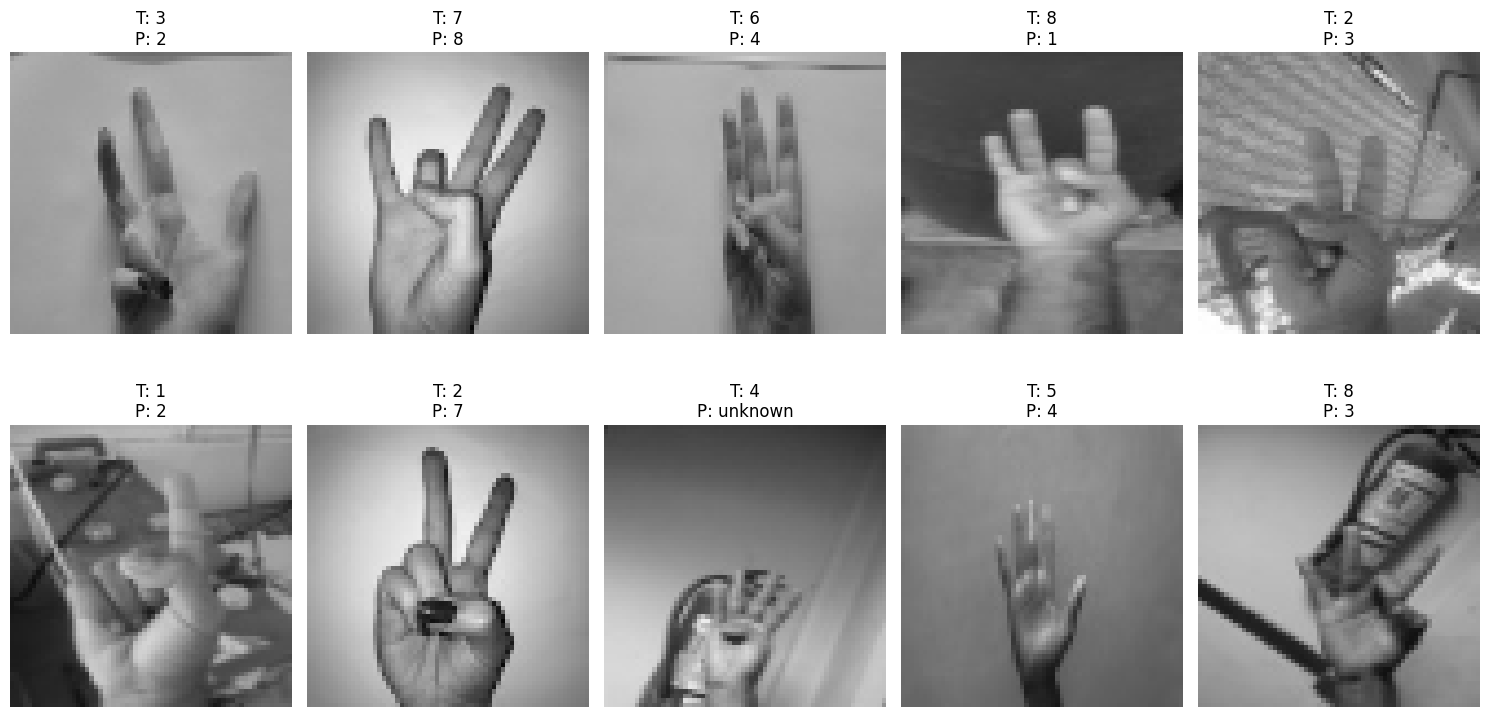

In [54]:
# Show some misclassified examples
misclassified_indices = np.where(y_pred_classes != y_true_classes)[0]
plt.figure(figsize=(15, 8))
for i, idx in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    plt.title(f"T: {class_names[y_true_classes[idx]]}\nP: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.savefig("misclassified_examples_slide.png")
plt.show()


78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step


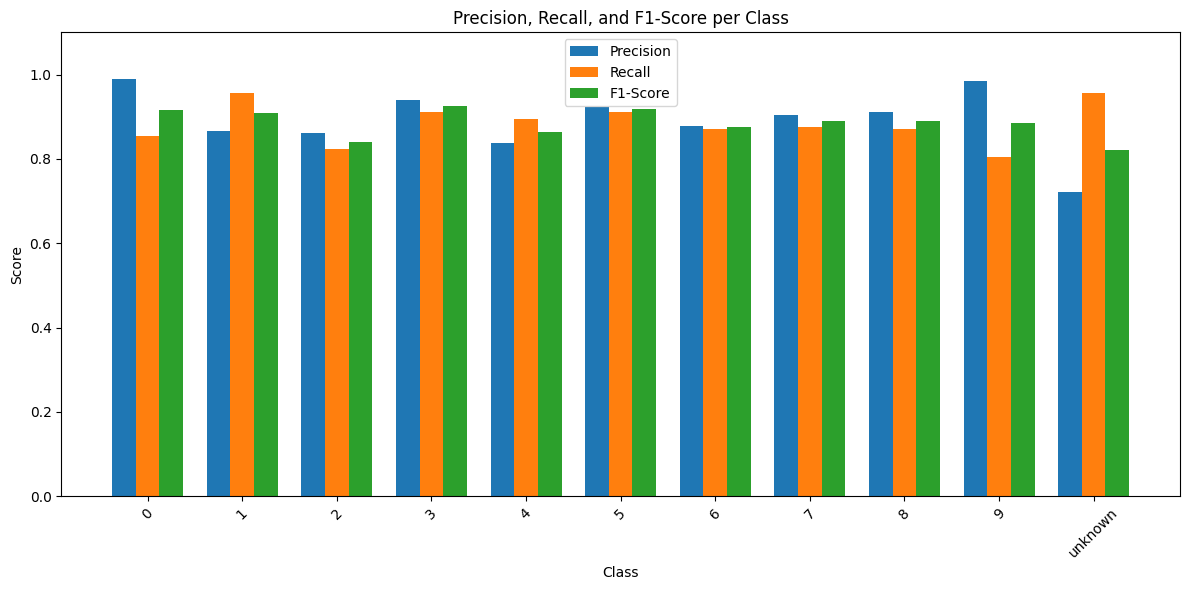

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from tensorflow.keras.models import load_model

# Load preprocessed test data
X_test = np.load('data/X_test.npy')
y_test_cat = np.load('data/y_test_cat.npy')

# Load the trained model
model = load_model('models/hand_gesture_model.keras')

# Define class names
class_names = [str(i) for i in range(10)] + ["unknown"]

# Predict and decode labels
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)

# Extract metrics
precision = [report[cls]['precision'] for cls in class_names]
recall = [report[cls]['recall'] for cls in class_names]
f1 = [report[cls]['f1-score'] for cls in class_names]

# Plot
x = np.arange(len(class_names))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, precision, width=width, label='Precision')
plt.bar(x, recall, width=width, label='Recall')
plt.bar(x + width, f1, width=width, label='F1-Score')

plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score per Class')
plt.xticks(x, class_names, rotation=45)
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.savefig('metrics_bar_chart.png')
plt.show()


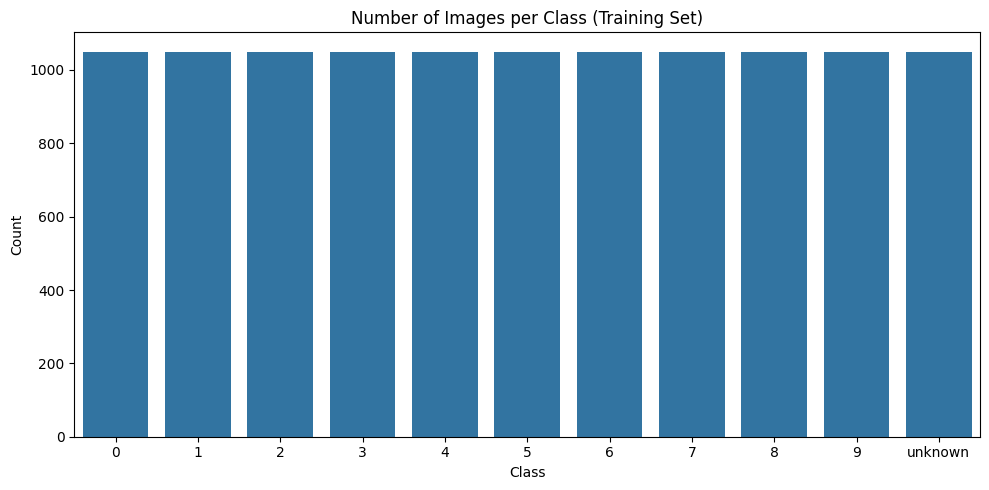

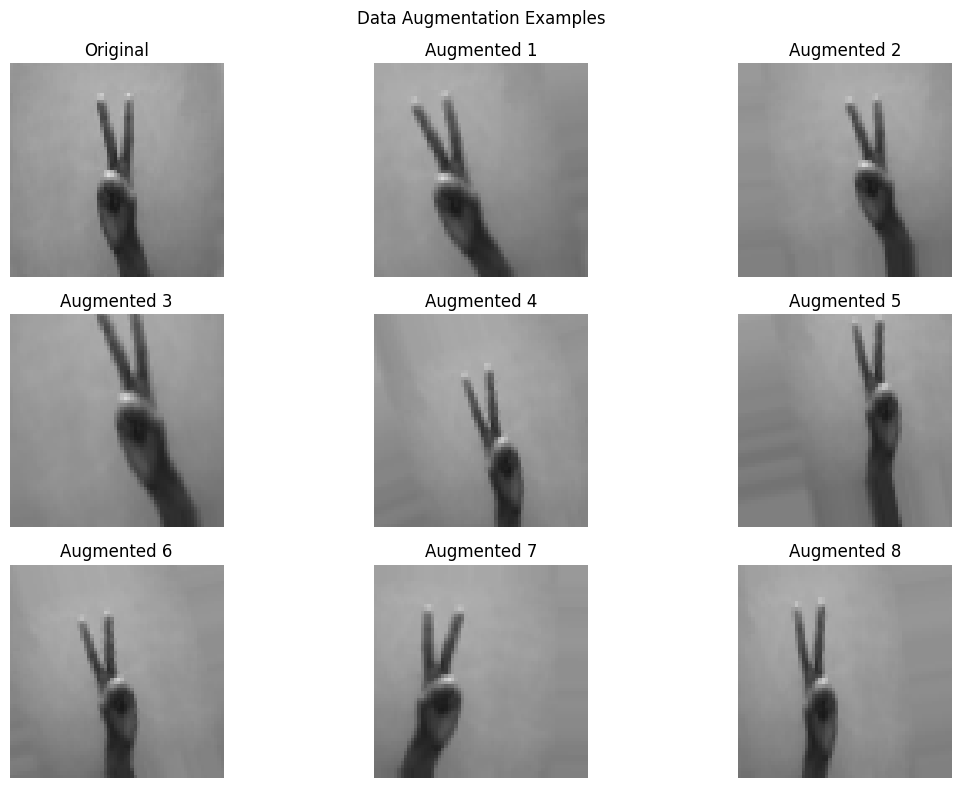

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load raw dataset and labels (use your saved data if needed)
X = np.load('data/X_train.npy')  # or the original full dataset if available
y = np.argmax(np.load('data/y_train_cat.npy'), axis=1)
class_names = [str(i) for i in range(10)] + ["unknown"]

# === 1. Plot Class Distribution ===
plt.figure(figsize=(10, 5))
unique, counts = np.unique(y, return_counts=True)
sns.barplot(x=[class_names[i] for i in unique], y=counts)
plt.title('Number of Images per Class (Training Set)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

# === 2. Augmentation Preview ===
# Pick a sample image from class '2' or any other
sample_idx = np.where(y == 2)[0][0]  # Change class if needed
sample_img = X[sample_idx]

# Define augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images
aug_iter = datagen.flow(np.expand_dims(sample_img, axis=0), batch_size=1)

plt.figure(figsize=(12, 8))
plt.subplot(3, 3, 1)
plt.imshow(sample_img)
plt.title("Original")
plt.axis('off')

for i in range(8):
    aug_img = next(aug_iter)[0]
    plt.subplot(3, 3, i + 2)
    plt.imshow(aug_img)
    plt.title(f"Augmented {i+1}")
    plt.axis('off')

plt.suptitle("Data Augmentation Examples")
plt.tight_layout()
plt.savefig('augmentation_examples.png')
plt.show()


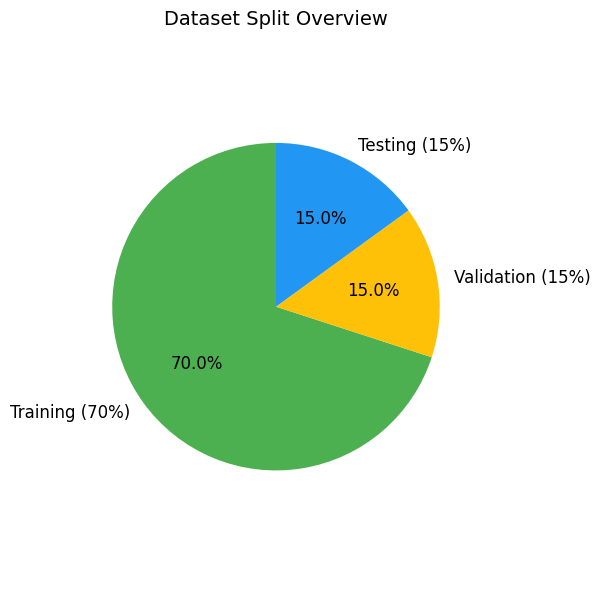

In [60]:
import matplotlib.pyplot as plt

# Dataset sizes based on your actual code
train_count = 11550
val_count = 2475
test_count = 2475

# Labels and sizes
labels = ['Training (70%)', 'Validation (15%)', 'Testing (15%)']
sizes = [train_count, val_count, test_count]
colors = ['#4CAF50', '#FFC107', '#2196F3']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
plt.title('Dataset Split Overview', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie.
plt.tight_layout()
plt.savefig('dataset_split_pie_chart.png')  # Save to file
plt.show()


C:\Users\shroo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


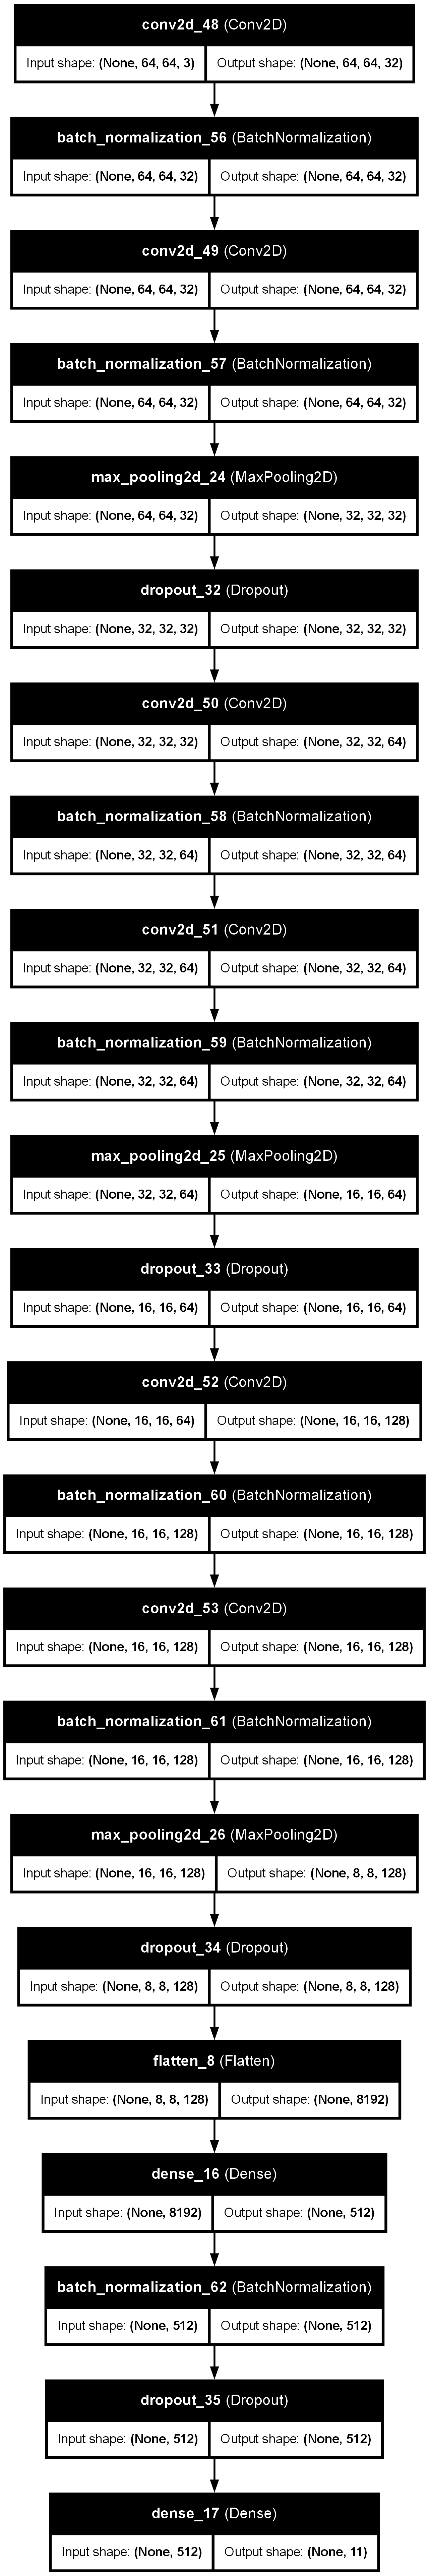

In [61]:
from tensorflow.keras.utils import plot_model
model = build_custom_cnn()
plot_model(model, to_file='cnn_architecture.png', show_shapes=True, show_layer_names=True)


# Milestone 3: Real-Time Gesture Recognition and Deployment

In [2]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model 
import time
import os

In [3]:
# Constants
IMG_SIZE = 64
NUM_CLASSES = 11

In [4]:
class HandGestureRecognizer:
    def __init__(self, model_path, class_names=None):
        """Initialize the hand gesture recognizer with a trained model"""
        # Load model
        self.model = load_model(model_path)
        print(f"Model loaded from {model_path}")
        
        # Set class names
        if class_names is None:
            # Default class names for numbers 0-9 and unknown
            self.class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']
        else:
            self.class_names = class_names
        
        # Preprocessing parameters
        self.img_size = IMG_SIZE
    
    def preprocess_frame(self, frame):
        """Preprocess a video frame for prediction"""
        # Resize frame to expected input size
        resized = cv2.resize(frame, (self.img_size, self.img_size))
        
        # Convert to RGB if it's BGR
        if len(resized.shape) == 3 and resized.shape[2] == 3:
            resized = cv2.cvtColor(resized, cv2.COLOR_BGR2RGB)
        
        # Normalize pixel values
        normalized = resized.astype('float32') / 255.0
        
        # Expand dimensions to match model input shape
        expanded = np.expand_dims(normalized, axis=0)
        
        return expanded
    
    def predict(self, frame):
        """Make a prediction on a single frame"""
        # Preprocess the frame
        processed_frame = self.preprocess_frame(frame)
        
        # Make prediction
        prediction = self.model.predict(processed_frame, verbose=0)[0]
        
        # Get class index and confidence
        class_idx = np.argmax(prediction)
        confidence = prediction[class_idx]
        
        # Get class name
        class_name = self.class_names[class_idx]
        
        return class_name, confidence, prediction


In [7]:
def run_real_time_recognition():
    """Run real-time hand gesture recognition using webcam"""
    # Check if model exists
    model_path = 'models/hand_gesture_model.keras'
    if not os.path.exists(model_path):
        print(f"Error: Model not found at {model_path}")
        print("Please train the model first or provide the correct path.")
        return
    
    # Initialize recognizer
    recognizer = HandGestureRecognizer(model_path)
    
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    
    # Check if webcam opened successfully
    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return
    
    # Set frame size
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
    
    # Create window
    cv2.namedWindow('Hand Gesture Recognition', cv2.WINDOW_NORMAL)
    
    # ROI coordinates (default to center of frame)
    roi_size = 300
    roi_x, roi_y = None, None
    
    # Prediction variables
    last_prediction = None
    prediction_confidence = 0
    prediction_time = time.time()
    confidence_threshold = 0.7
    prediction_cooldown = 1.0  # seconds
    
    print("Press 'q' to quit, 'r' to reset ROI")
    
    while True:
        # Read frame
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture frame.")
            break
        
        # Flip frame horizontally for a more natural interaction
        frame = cv2.flip(frame, 1)
        
        # Set ROI position if not set
        if roi_x is None or roi_y is None:
            h, w = frame.shape[:2]
            roi_x = (w - roi_size) // 2
            roi_y = (h - roi_size) // 2
        
        # Draw ROI rectangle
        cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_size, roi_y + roi_size), (0, 255, 0), 2)
        
        # Extract ROI
        roi = frame[roi_y:roi_y + roi_size, roi_x:roi_x + roi_size]
        
        # Make prediction every 100ms
        current_time = time.time()
        if current_time - prediction_time > 0.1:
            try:
                # Get prediction
                class_name, confidence, _ = recognizer.predict(roi)
                
                # Update prediction if confidence is high enough
                if confidence > confidence_threshold and (last_prediction != class_name or current_time - prediction_time > prediction_cooldown):
                    last_prediction = class_name
                    prediction_confidence = confidence
                    prediction_time = current_time
            except Exception as e:
                print(f"Prediction error: {e}")
        
        # Display prediction
        if last_prediction is not None:
            # Display prediction text
            text = f"{last_prediction} ({prediction_confidence:.2f})"
            cv2.putText(frame, text, (roi_x, roi_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        
        # Show instruction text
        cv2.putText(frame, "Place hand gesture in green box", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
        
        # Display the frame
        cv2.imshow('Hand Gesture Recognition', frame)
        
        # Process key presses
        key = cv2.waitKey(1) & 0xFF
        
        if key == ord('q'):
            # Quit
            break
        elif key == ord('r'):
            # Reset ROI
            roi_x, roi_y = None, None
    
    # Release resources
    cap.release()
    cv2.destroyAllWindows()

In [8]:
import mediapipe as mp

class MediapipeHandGestureRecognizer(HandGestureRecognizer):
            def __init__(self, model_path, class_names=None):
                """Initialize with mediapipe hand detection"""
                super().__init__(model_path, class_names)
                
                # Initialize mediapipe
                self.mp_hands = mp.solutions.hands
                self.mp_drawing = mp.solutions.drawing_utils
                self.hands = self.mp_hands.Hands(
                    static_image_mode=False,
                    max_num_hands=1,
                    min_detection_confidence=0.5,
                    min_tracking_confidence=0.5
                )
            
            def detect_and_preprocess_hand(self, frame):
                """Detect hand in the frame and crop it for prediction"""
                # Convert to RGB for mediapipe
                rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                
                # Process frame with mediapipe
                results = self.hands.process(rgb_frame)
                
                # Initialize variables
                hand_detected = False
                processed_hand = None
                hand_landmarks = None
                
                # Check if hand is detected
                if results.multi_hand_landmarks:
                    # Get first hand landmarks
                    hand_landmarks = results.multi_hand_landmarks[0]
                    
                    # Get bounding box
                    h, w = frame.shape[:2]
                    x_min, y_min = w, h
                    x_max, y_max = 0, 0
                    
                    for landmark in hand_landmarks.landmark:
                        x, y = int(landmark.x * w), int(landmark.y * h)
                        x_min = min(x_min, x)
                        y_min = min(y_min, y)
                        x_max = max(x_max, x)
                        y_max = max(y_max, y)
                    
                    # Add padding
                    padding = 20
                    x_min = max(0, x_min - padding)
                    y_min = max(0, y_min - padding)
                    x_max = min(w, x_max + padding)
                    y_max = min(h, y_max + padding)
                    
                    # Make square bounding box
                    box_size = max(x_max - x_min, y_max - y_min)
                    x_center = (x_min + x_max) // 2
                    y_center = (y_min + y_max) // 2
                    
                    x_min = max(0, x_center - box_size // 2)
                    y_min = max(0, y_center - box_size // 2)
                    x_max = min(w, x_center + box_size // 2)
                    y_max = min(h, y_center + box_size // 2)
                    
                    # Crop hand region
                    if x_max > x_min and y_max > y_min:
                        hand_crop = frame[y_min:y_max, x_min:x_max]
                        
                        # Preprocess for prediction
                        processed_hand = self.preprocess_frame(hand_crop)
                        hand_detected = True
                
                return hand_detected, processed_hand, hand_landmarks, results
            
            def predict_with_detection(self, frame):
                """Detect hand and predict gesture"""
                hand_detected, processed_hand, landmarks, results = self.detect_and_preprocess_hand(frame)
                
                if hand_detected:
                    # Make prediction
                    prediction = self.model.predict(processed_hand, verbose=0)[0]
                    
                    # Get class index and confidence
                    class_idx = np.argmax(prediction)
                    confidence = prediction[class_idx]
                    
                    # Get class name
                    class_name = self.class_names[class_idx]
                    
                    return True, class_name, confidence, landmarks, results
                
                return False, None, 0, None, results
            
            def draw_result(self, frame, detected, class_name, confidence, landmarks, results):
                """Draw detection and prediction results on frame"""
                # Draw hand landmarks if detected
                if results.multi_hand_landmarks:
                    for hand_landmarks in results.multi_hand_landmarks:
                        self.mp_drawing.draw_landmarks(
                            frame,
                            hand_landmarks,
                            self.mp_hands.HAND_CONNECTIONS
                        )
            # Display prediction if hand detected
                if detected:
                    # Display prediction text
                    text = f"{class_name} ({confidence:.2f})"
                    cv2.putText(frame, text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                else:
                    # Display "No hand detected" message
                    cv2.putText(frame, "No hand detected", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
                
                return frame

In [9]:
def create_hand_detection_version():
    """Advanced version using hand detection"""
    try:
                
        def run_mediapipe_recognition():
            """Run real-time hand gesture recognition using mediapipe hand detection"""
            # Check if model exists
            model_path = 'models/hand_gesture_model.keras'
            if not os.path.exists(model_path):
                print(f"Error: Model not found at {model_path}")
                print("Please train the model first or provide the correct path.")
                return
            
            # Initialize recognizer
            recognizer = MediapipeHandGestureRecognizer(model_path)
            
            # Initialize webcam
            cap = cv2.VideoCapture(0)
            
            # Check if webcam opened successfully
            if not cap.isOpened():
                print("Error: Could not open webcam.")
                return
            
            # Set frame size
            cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
            cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
            
            # Create window
            cv2.namedWindow('Hand Gesture Recognition', cv2.WINDOW_NORMAL)
            
            # Prediction variables
            last_prediction = None
            prediction_confidence = 0
            prediction_time = time.time()
            confidence_threshold = 0.7
            prediction_cooldown = 0.5  # seconds
            
            print("Press 'q' to quit")
            
            while True:
                # Read frame
                ret, frame = cap.read()
                
                if not ret:
                    print("Error: Failed to capture frame.")
                    break
                
                # Flip frame horizontally for a more natural interaction
                frame = cv2.flip(frame, 1)
                
                # Make prediction
                current_time = time.time()
                try:
                    # Get prediction with hand detection
                    detected, class_name, confidence, landmarks, results = recognizer.predict_with_detection(frame)
                    
                    # Update prediction if hand detected and confidence is high
                    if detected and confidence > confidence_threshold and (last_prediction != class_name or current_time - prediction_time > prediction_cooldown):
                        last_prediction = class_name
                        prediction_confidence = confidence
                        prediction_time = current_time
                    
                    # Draw result on frame
                    frame = recognizer.draw_result(frame, detected, last_prediction, prediction_confidence, landmarks, results)
                except Exception as e:
                    print(f"Prediction error: {e}")
                
                # Display instruction text
                cv2.putText(frame, "Show hand gesture to camera", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
                
                # Display the frame
                cv2.imshow('Hand Gesture Recognition', frame)
                
                # Process key presses
                key = cv2.waitKey(1) & 0xFF
                
                if key == ord('q'):
                    # Quit
                    break
            
            # Release resources
            cap.release()
            cv2.destroyAllWindows()
            recognizer.hands.close()
        
        print("MediaPipe is available! You can use advanced hand detection.")
        return run_mediapipe_recognition
    except ImportError:
        print("MediaPipe not found. Using basic version without hand detection.")
        return run_real_time_recognition


In [10]:
def build_gui_app():
    """Create a simple GUI for the hand gesture recognition system"""
    try:
        import tkinter as tk
        from tkinter import ttk
        from PIL import Image, ImageTk
        
        class HandGestureRecognitionApp:
            def __init__(self, root):
                self.root = root
                self.root.title("Hand Gesture Recognition System")
                self.root.geometry("800x600")
                
                # Initialize variables
                self.is_running = False
                self.cap = None
                self.recognizer = None
                
                # Create main frames
                self.create_widgets()
                
                # Protocol to handle window close
                self.root.protocol("WM_DELETE_WINDOW", self.on_close)
            
            def create_widgets(self):
                # Create main frame
                main_frame = ttk.Frame(self.root, padding=10)
                main_frame.pack(fill=tk.BOTH, expand=True)
                
                # Title
                title_label = ttk.Label(
                    main_frame, 
                    text="Hand Gesture Recognition System", 
                    font=("Arial", 18)
                )
                title_label.pack(pady=10)
                
                # Video frame
                self.video_frame = ttk.Frame(main_frame, borderwidth=2, relief=tk.GROOVE)
                self.video_frame.pack(fill=tk.BOTH, expand=True, pady=10)
                
                # Create canvas for video display
                self.canvas = tk.Canvas(self.video_frame, bg="black")
                self.canvas.pack(fill=tk.BOTH, expand=True)
                
                # Control frame
                control_frame = ttk.Frame(main_frame)
                control_frame.pack(fill=tk.X, pady=10)
                
                # Start/Stop button
                self.start_stop_btn = ttk.Button(
                    control_frame, 
                    text="Start", 
                    command=self.toggle_recognition
                )
                self.start_stop_btn.pack(side=tk.LEFT, padx=5)
                
                # Mode selection
                ttk.Label(control_frame, text="Mode:").pack(side=tk.LEFT, padx=5)
                self.mode_var = tk.StringVar(value="Basic")
                mode_combobox = ttk.Combobox(
                    control_frame,
                    textvariable=self.mode_var,
                    values=["Basic", "MediaPipe (Advanced)"],
                    state="readonly",
                    width=20
                )
                mode_combobox.pack(side=tk.LEFT, padx=5)
                
                # Results frame
                results_frame = ttk.LabelFrame(main_frame, text="Recognition Results", padding=10)
                results_frame.pack(fill=tk.X, pady=10)
                
                # Result label
                self.result_var = tk.StringVar(value="No gesture detected")
                result_label = ttk.Label(
                    results_frame,
                    textvariable=self.result_var,
                    font=("Arial", 14)
                )
                result_label.pack(fill=tk.X)
                
                # Confidence bar
                ttk.Label(results_frame, text="Confidence:").pack(anchor=tk.W)
                self.confidence_bar = ttk.Progressbar(results_frame, orient=tk.HORIZONTAL, length=100, mode='determinate')
                self.confidence_bar.pack(fill=tk.X, pady=5)
                
                # Status bar
                self.status_var = tk.StringVar(value="Ready")
                status_bar = ttk.Label(self.root, textvariable=self.status_var, relief=tk.SUNKEN, anchor=tk.W)
                status_bar.pack(side=tk.BOTTOM, fill=tk.X)
            
            def toggle_recognition(self):
                if self.is_running:
                    self.stop_recognition()
                else:
                    self.start_recognition()
            
            def start_recognition(self):
                # Check if model exists
                model_path = 'models/hand_gesture_model.keras'
                if not os.path.exists(model_path):
                    self.status_var.set("Error: Model not found! Please train the model first.")
                    return
                
                # Initialize webcam
                self.cap = cv2.VideoCapture(0)
                
                # Check if webcam opened successfully
                if not self.cap.isOpened():
                    self.status_var.set("Error: Could not open webcam.")
                    return
                
                # Set frame size
                self.cap.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
                self.cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)
                
                # Initialize recognizer based on mode
                mode = self.mode_var.get()
                try:
                    if mode == "MediaPipe (Advanced)":
                        import mediapipe as mp
                        self.recognizer = MediapipeHandGestureRecognizer(model_path)
                        self.use_mediapipe = True
                    else:
                        self.recognizer = HandGestureRecognizer(model_path)
                        self.use_mediapipe = False
                    
                    self.status_var.set(f"Started recognition in {mode} mode")
                    self.is_running = True
                    self.start_stop_btn.config(text="Stop")
                    
                    # Start video processing
                    self.process_video()
                except Exception as e:
                    self.status_var.set(f"Error: {str(e)}")
            
            def stop_recognition(self):
                # Stop recognition
                self.is_running = False
                self.start_stop_btn.config(text="Start")
                self.status_var.set("Recognition stopped")
                
                # Release resources
                if self.cap is not None:
                    self.cap.release()
                    self.cap = None
                
                # Close mediapipe resources if used
                if self.recognizer is not None and self.use_mediapipe:
                    self.recognizer.hands.close()
                
                # Clear display
                self.canvas.delete("all")
                self.result_var.set("No gesture detected")
                self.confidence_bar['value'] = 0
            
            def process_video(self):
                if not self.is_running:
                    return
                
                # Read frame
                ret, frame = self.cap.read()
                
                if ret:
                    # Flip frame horizontally for more natural interaction
                    frame = cv2.flip(frame, 1)
                    
                    # Process with appropriate method
                    if self.use_mediapipe:
                        detected, class_name, confidence, landmarks, results = self.recognizer.predict_with_detection(frame)
                        frame = self.recognizer.draw_result(frame, detected, class_name, confidence, landmarks, results)
                        
                        if detected and confidence > 0.7:
                            self.result_var.set(f"Detected: {class_name}")
                            self.confidence_bar['value'] = confidence * 100
                    else:
                        # Use basic method with ROI
                        h, w = frame.shape[:2]
                        roi_size = 300
                        roi_x = (w - roi_size) // 2
                        roi_y = (h - roi_size) // 2
                        
                        # Draw ROI rectangle
                        cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_size, roi_y + roi_size), (0, 255, 0), 2)
                        
                        # Extract ROI
                        roi = frame[roi_y:roi_y + roi_size, roi_x:roi_x + roi_size]
                        
                        # Get prediction
                        class_name, confidence, _ = self.recognizer.predict(roi)
                        
                        # Display prediction if confidence is high enough
                        if confidence > 0.7:
                            text = f"{class_name} ({confidence:.2f})"
                            cv2.putText(frame, text, (roi_x, roi_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
                            
                            self.result_var.set(f"Detected: {class_name}")
                            self.confidence_bar['value'] = confidence * 100
                    
                    # Convert frame to display on canvas
                    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    img = Image.fromarray(frame_rgb)
                    self.photo = ImageTk.PhotoImage(image=img)
                    
                    # Update canvas
                    self.canvas.config(width=frame.shape[1], height=frame.shape[0])
                    self.canvas.create_image(0, 0, image=self.photo, anchor=tk.NW)
                
                # Schedule next frame processing
                self.root.after(33, self.process_video)  # ~30 FPS
            
            def on_close(self):
                # Stop recognition if running
                if self.is_running:
                    self.stop_recognition()
                
                # Close window
                self.root.destroy()
        
        def launch_gui():
            root = tk.Tk()
            app = HandGestureRecognitionApp(root)
            root.mainloop()
        
        print("Tkinter is available! You can use the GUI application.")
        return launch_gui
    except ImportError:
        print("Tkinter or PIL not found. Using command-line interface.")
        return create_hand_detection_version()


In [11]:
if __name__ == "__main__":
    print("Hand Gesture Recognition System")
    print("===============================")
    print("1. Basic Recognition (with ROI)")
    print("2. Advanced Recognition (with hand detection, if available)")
    print("3. GUI Application (if available)")
    print("===============================")
    
    choice = input("Select mode (1-3): ")
    
    if choice == '1':
        run_real_time_recognition()
    elif choice == '2':
        detector_func = create_hand_detection_version()
        detector_func()
    elif choice == '3':
        gui_func = build_gui_app()
        gui_func()
    else:
        print("Invalid choice. Running basic recognition.")
        run_real_time_recognition()

Hand Gesture Recognition System
1. Basic Recognition (with ROI)
2. Advanced Recognition (with hand detection, if available)
3. GUI Application (if available)
Tkinter is available! You can use the GUI application.
Model loaded from models/hand_gesture_model.keras


# Milestone 4: MLOps Implementation and Model Monitoring